## Preprocessing

In [1]:
# Import our dependencies

# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay


# visualization
import matplotlib.pyplot as plt
import seaborn as sns



# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Import and read the charity_data.csv.

application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [4]:
application_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [5]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df = application_df.drop(columns = ['EIN'])

In [6]:
# Determine the number of unique values in each column.
for x in application_df.columns:
    print(x, len(application_df[x].unique()))

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [7]:
# Determine the number of unique values in each column.
cols = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL']

for col in cols:
  print(col)
  print(application_df[col].nunique())
  print(application_df[col].value_counts())
  print()

APPLICATION_TYPE
17
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

AFFILIATION
6
AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64

CLASSIFICATION
71
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

USE_CASE
5
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

ORGANIZATION
4
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation  

In [8]:
# Look at NAME value counts to identify and replace with "Other"
name_counts = application_df['NAME'].value_counts()
name_counts

,count
NAME,
PARENT BOOSTER USA INC,1260
TOPS CLUB INC,765
UNITED STATES BOWLING CONGRESS INC,700
WASHINGTON STATE UNIVERSITY,492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,408
...,...
ST LOUIS SLAM WOMENS FOOTBALL,1
AIESEC ALUMNI IBEROAMERICA CORP,1
WEALLBLEEDRED ORG INC,1


In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable `names_to_replace`
names_to_replace = list(name_counts[name_counts<100].index)
names_to_replace

['AIR FORCE ASSOCIATION',
 'WORKERS UNITED',
 'GAMMA THETA UPSILON',
 'INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS',
 'SOCIETY OF SAINT VINCENT DE PAUL COUNCIL OF LOS ANGELES',
 'ROTARY INTERNATIONAL',
 'CALIFORNIA GARDEN CLUBS INC',
 'SWEET ADELINES INTERNATIONAL',
 'DISABLED AMERICAN VETERANS',
 'KLEIN SUPPORT GROUPS INC',
 'CLEARCREEK I S D SUPPORT GROUPS',
 'VFW AUXILIARY DEPARTMENT OF OKLAHOMA INC',
 'DEPARTMENT OF KANSAS LADIES AUXILIARY TO THE VFW OF THE US INC',
 'CISD EDUCATIONAL SUPPORT GROUPS INC',
 'SONS OF CONFEDERATE VETERANS INC',
 'SLOW FOOD USA INC',
 'NATIONAL YOUNG MENS SERVICE LEAGUE',
 'AMATEUR ATHLETIC UNION OF THE UNITED STATES',
 'LAMBDA THETA ALPHA',
 'UNITED FEDERATION OF DOLL CLUBS INC',
 'UNIVERSITY OF FLORIDA',
 'AMERICAN YOUTH FOOTBALL INC',
 'AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC',
 'MUSIC TEACHERS NATIONAL ASSOCIATION INC',
 'INTERNATIONAL MOUNTAIN BICYCLING ASSOCIATION - COLORADO',
 'MARINE CORPS LEAGUE',
 'CLEAR CREEK ISD GROUPS',
 'DEPARTMENT OF

In [10]:
# Replace the categories in the DataFrame
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Verify the replacement
application_df['NAME'].value_counts()

,count
NAME,
Other,25987
PARENT BOOSTER USA INC,1260
TOPS CLUB INC,765
UNITED STATES BOWLING CONGRESS INC,700
WASHINGTON STATE UNIVERSITY,492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,408
PTA TEXAS CONGRESS,368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,331
ALPHA PHI SIGMA,313


In [11]:
# Look at APPLICATION_TYPE value counts
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [12]:
# Choose a cutoff value and create a list of APLICATION TYPE to be replaced
application_to_replace = list (app_counts[app_counts<500].index)

# Replace in dataframe
for cls in application_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [13]:
# Look at CLASSIFICATION value counts
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [14]:
# Choose a cutoff value and create a list of CLASSIFICATION TYPE to be replaced
classification_to_replace = list (class_counts[class_counts<100].index)

# Replace in dataframe
for classification in classification_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(classification,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,669
C1700,287
C4000,194


## Other variables

In [15]:
# Look at AFFILIATION value counts to identify and replace with "Other
afiliations_unique = application_df["AFFILIATION"].value_counts()
afiliations_unique

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Family/Parent,64
National,33
Regional,13
Other,4


In [16]:
# Choose a cutoff value and create a list of afiliations to be replaced
# use the variable name `afiliations_to_replace`
afiliations_to_replace = list(afiliations_unique[afiliations_unique <10000].index)


# Replace in dataframe
for cls in afiliations_to_replace:
  application_df['AFFILIATION'] =application_df['AFFILIATION'].replace(cls,"Other")


# Check to make sure replacement was successful
application_df['AFFILIATION'].value_counts()

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Other,114


In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [18]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop('IS_SUCCESSFUL', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## **Compile, Train and Evaluate the Model**

### **Network 1 (Neutral Network Model 3):**

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 100
hidden_nodes_layer3 =50
hidden_nodes_layer4 = 20

nn_model_3 = tf.keras.models.Sequential()

# First hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# four hidden layer
nn_model_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='relu'))

# Output layer
nn_model_3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           7,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,991 (93.71 KB)

 Trainable params: 23,991 (93.71 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
nn_model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model:
# Epoch: One pass through all of the rows in the training dataset
# Batch: One or more samples considered by the model within an epoch before weights are updated
# Define early stopping with a patience of 10 epochs
# patience=10: This means the model will stop training if the validation loss doesn’t improve for 10 consecutive epochs.
# restore_best_weights=True: This will revert the model to the state with the lowest validation loss, ensuring you use the best model.

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

fit_model = nn_model_3.fit(X_train_scaled, y_train,
                   validation_data=(X_test_scaled, y_test),
                   epochs=100, batch_size=32,
                   callbacks=[early_stopping])

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7284 - loss: 0.5317 - val_accuracy: 0.7483 - val_loss: 0.5001
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7527 - loss: 0.4956 - val_accuracy: 0.7515 - val_loss: 0.4954
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7551 - loss: 0.4890 - val_accuracy: 0.7552 - val_loss: 0.4931
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7563 - loss: 0.4900 - val_accuracy: 0.7546 - val_loss: 0.4922
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7609 - loss: 0.4851 - val_accuracy: 0.7513 - val_loss: 0.4965
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7602 - loss: 0.4844 - val_accuracy: 0.7548 - val_loss: 0.4940
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7577 - loss: 0.4877 - val_accuracy: 0.7522 - val_loss: 0.4940
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7594 - loss: 0.4845 - val_accu

In [23]:
checkpoint = ModelCheckpoint('model_weights.weights.h5', # Added '.weights' to the filename
                             save_weights_only=True,
                             save_freq=5*X_train_scaled.shape[0], # save_freq is in terms of training samples
                             save_best_only=True)

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7562 - loss: 0.4906
Loss: 0.49060654640197754, Accuracy: 0.7561516165733337


In [25]:
# Export our model to HDF5 file
nn_model_3.save('/content/Model_h5/AlphabetSoupCharity_Optimization_3.h5')

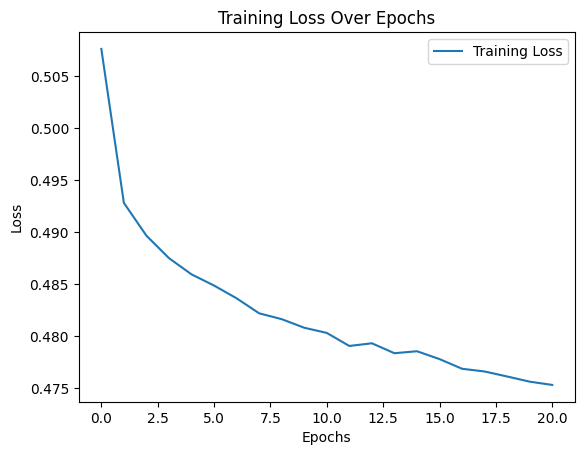

In [26]:
# Create output folder
output = '/content/output'
os.makedirs(output, exist_ok=True)

 # Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
plt.plot(fit_model.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
# Save the graph
plt.savefig(os.path.join(output, "Model_3_loss.png"))

# Diplay
plt.show()

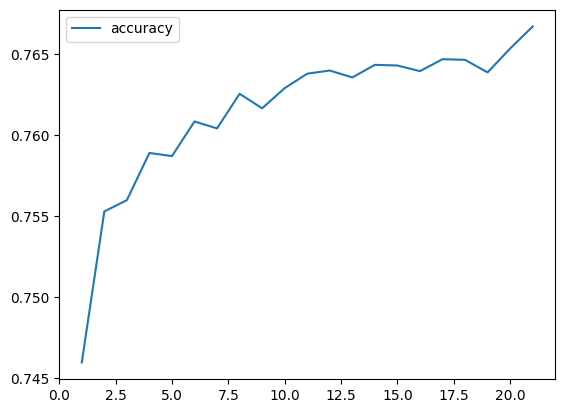

In [27]:
# plotting the accuracy
history_df.plot(y="accuracy")
# Save the graph
plt.savefig(os.path.join(output, "Model_3_accuracy.png"))
# Display
plt.show()

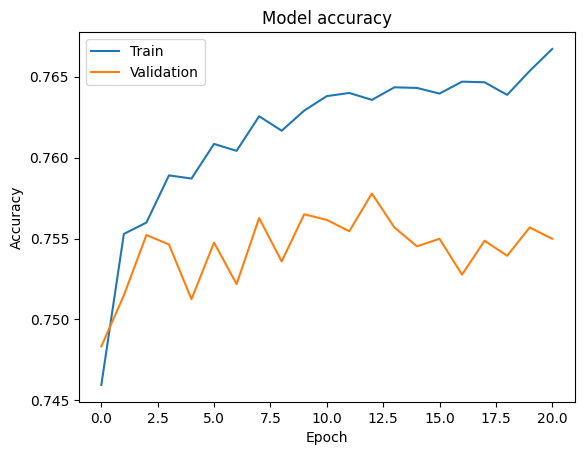

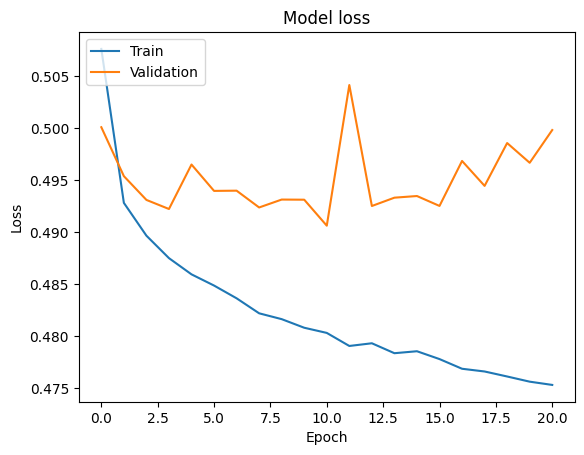

In [28]:
# Plot training & validation accuracy values
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Save the graph
plt.savefig(os.path.join(output, "Model_Accuracy_3.png"))
# Display
plt.show()

# Plot training & validation loss values
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
# Save the graph
plt.savefig(os.path.join(output, "Model_loss_3.png"))
# Display
plt.show()

In [29]:
def doClassification_NN(model, X_train, X_test, y_train, y_test):
    # predict
    # Convert X_train to float32
    X_train = X_train.astype(np.float32) # Changed to convert to float32
    train_preds = model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_proba = model.predict(X_train)
    # Convert X_test to float32
    X_test = X_test.astype(np.float32) # Changed to convert to float32
    test_preds = model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_proba = model.predict(X_test)

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Display the confusion matrix plot
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, test_proba)
    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
TRAIN METRICS
    Confusion Matrix:
    [[    0 12045]
 [    0 13679]]

    AUC: 0.656749688970962

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00     12045
           1       0.53      1.00      0.69     13679

    accuracy                           0.53     25724
   macro avg       0.27      0.50      0.35     25724
weighted avg       0.28      0.53      0.37     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 3993]
 [   0 4582]]

    AUC: 0.6576881377854283

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      3993
           1       0.53      1.00      0.70      4582

    accuracy                           0.53      8575
   macro avg       0.27     

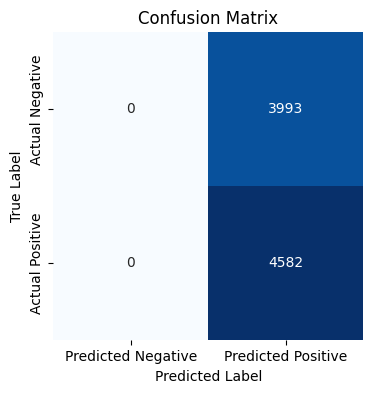

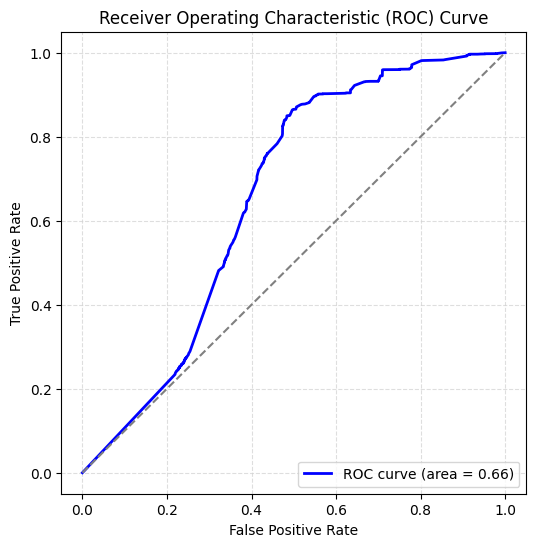

In [30]:
doClassification_NN(nn_model_3, X_train, X_test, y_train, y_test)

### **Network # 2 (Neutral Network Model 4)**

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5

nn_model_4 = tf.keras.models.Sequential()

# First hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

# Output layer
nn_model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 20)                  │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,831 (7.15 KB)

 Trainable params: 1,831 (7.15 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model
nn_model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Train the model:
# Epoch: One pass through all of the rows in the training dataset
# Batch: One or more samples considered by the model within an epoch before weights are updated
# Define early stopping with a patience of 10 epochs
# patience=10: This means the model will stop training if the validation loss doesn’t improve for 10 consecutive epochs.
# restore_best_weights=True: This will revert the model to the state with the lowest validation loss, ensuring you use the best model.

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

fit_model = nn_model_4.fit(X_train_scaled, y_train,
                   validation_data=(X_test_scaled, y_test),
                   epochs=50, batch_size=32,
                   callbacks=[early_stopping])

Epoch 1/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6667 - loss: 0.5956 - val_accuracy: 0.7478 - val_loss: 0.5067
Epoch 2/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7535 - loss: 0.4969 - val_accuracy: 0.7527 - val_loss: 0.4989
Epoch 3/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7617 - loss: 0.4880 - val_accuracy: 0.7522 - val_loss: 0.4960
Epoch 4/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7568 - loss: 0.4894 - val_accuracy: 0.7541 - val_loss: 0.4939
Epoch 5/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7627 - loss: 0.4880 - val_accuracy: 0.7517 - val_loss: 0.4956
Epoch 6/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7650 - loss: 0.4826 - val_accuracy: 0.7548 - val_loss: 0.4937
Epoch 7/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7580 - loss: 0.4852 - val_accuracy: 0.7541 - val_loss: 0.4926
Epoch 8/50
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7657 - loss: 0.4811 - val_accuracy: 0.

In [34]:
checkpoint = ModelCheckpoint('model_weights.weights.h5', # Added '.weights' to the filename
                             save_weights_only=True,
                             save_freq=5*X_train_scaled.shape[0], # save_freq is in terms of training samples
                             save_best_only=True)

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7541 - loss: 0.4908
Loss: 0.49081850051879883, Accuracy: 0.754052460193634


In [36]:
# Export our model to HDF5 file
nn_model_4.save('/content/Model_h5/AlphabetSoupCharity_Optimization_4.h5')

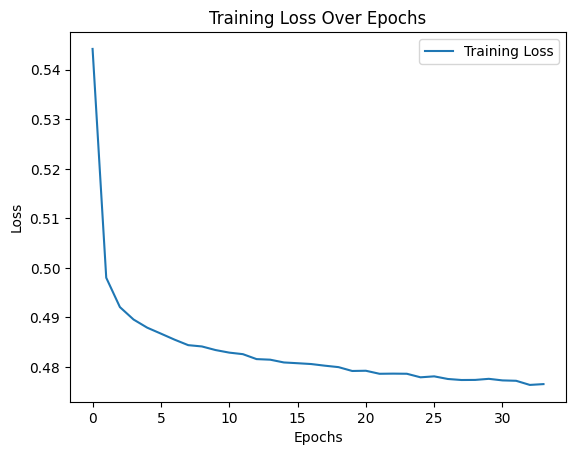

In [37]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
plt.plot(fit_model.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
# Save the graph
plt.savefig(os.path.join(output, "Model_4_loss.png"))

# Diplay
plt.show()

<Axes: >

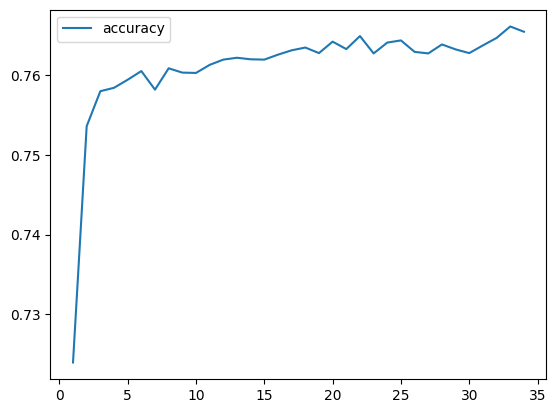

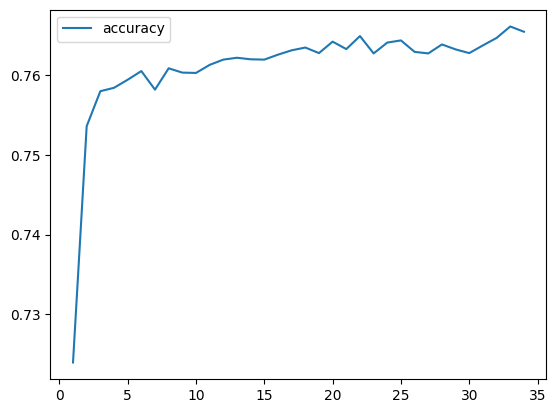

In [38]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')
# Save the graph
plt.savefig(os.path.join(output, "Model_4_accuracy.png"))
# Display
history_df.plot(y = 'accuracy')

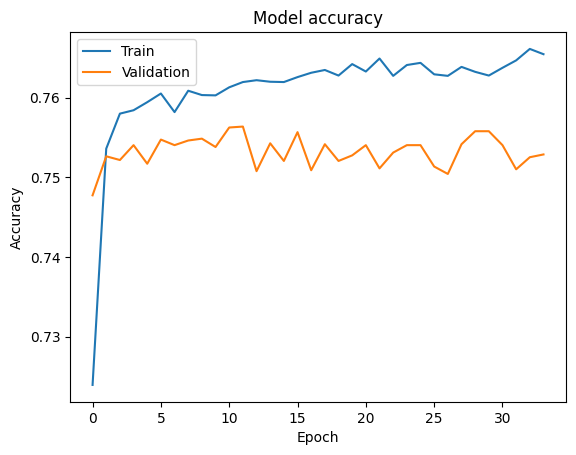

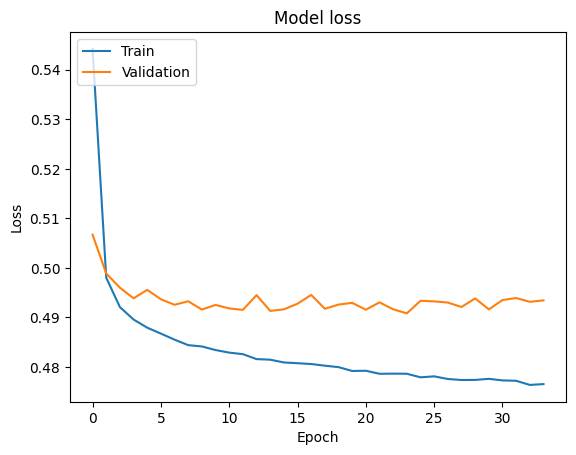

In [39]:
# Plot training & validation accuracy values
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Save the graph
plt.savefig(os.path.join(output, "Model_Accuracy_4.png"))
# Display
plt.show()

# Plot training & validation loss values
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
# Save the graph
plt.savefig(os.path.join(output, "Model_loss_4.png"))
# Display
plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
TRAIN METRICS
    Confusion Matrix:
    [[12045     0]
 [13679     0]]

    AUC: 0.4999900827582896

    Classification Report:
                  precision    recall  f1-score   support

           0       0.47      1.00      0.64     12045
           1       0.00      0.00      0.00     13679

    accuracy                           0.47     25724
   macro avg       0.23      0.50      0.32     25724
weighted avg       0.22      0.47      0.30     25724

    
TEST METRICS
    Confusion Matrix:
    [[3993    0]
 [4582    0]]

    AUC: 0.500060833215001

    Classification Report:
                  precision    recall  f1-score   support

           0       0.47      1.00      0.64      3993
           1       0.00      0.00      0.00      4582

    accuracy                           0.47      8575
   macro avg       0.23     

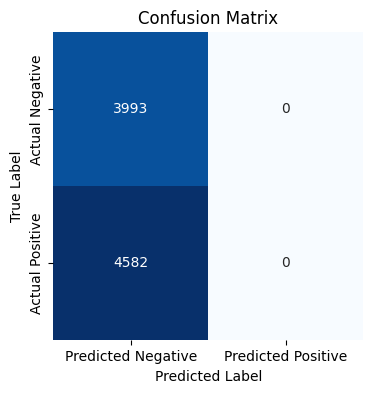

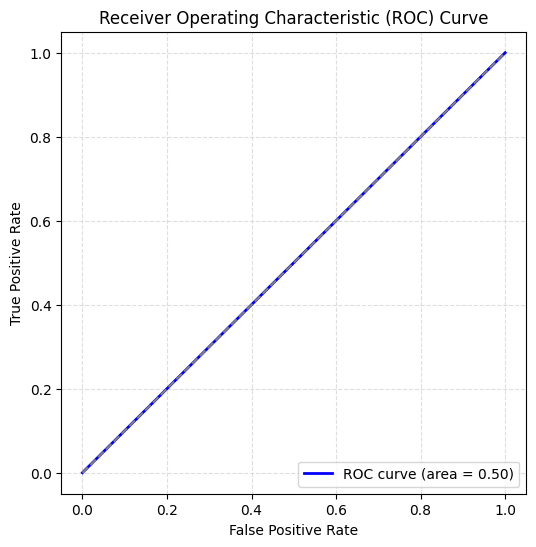

In [40]:
doClassification_NN(nn_model_4, X_train, X_test, y_train, y_test)

In [41]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)

    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    # Removed .values from y_test
    fpr, tpr, _ = roc_curve(y_test, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix:
    [[ 9211  2834]
 [ 1170 12509]]

    AUC: 0.9088636288528734

    Classification Report:
                  precision    recall  f1-score   support

           0       0.89      0.76      0.82     12045
           1       0.82      0.91      0.86     13679

    accuracy                           0.84     25724
   macro avg       0.85      0.84      0.84     25724
weighted avg       0.85      0.84      0.84     25724

    
TEST METRICS
    Confusion Matrix:
    [[2640 1353]
 [ 861 3721]]

    AUC: 0.7993557144907559

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.66      0.70      3993
           1       0.73      0.81      0.77      4582

    accuracy                           0.74      8575
   macro avg       0.74      0.74      0.74      8575
weighted avg       0.74      0.74      0.74      8575

    


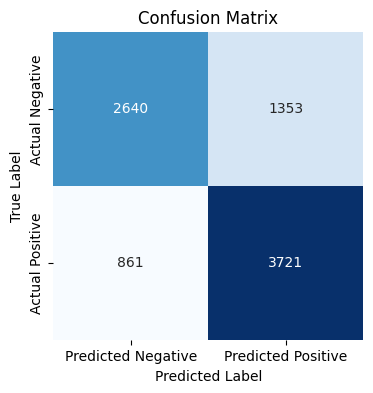

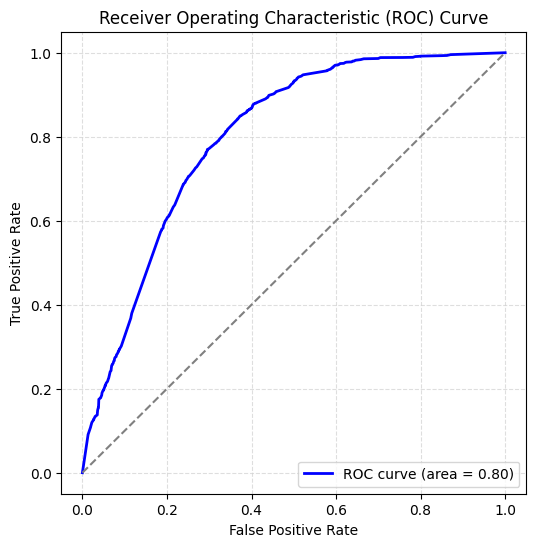

In [42]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

In [43]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix:
    [[ 7943  4102]
 [ 1760 11919]]

    AUC: 0.8446820779024826

    Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.66      0.73     12045
           1       0.74      0.87      0.80     13679

    accuracy                           0.77     25724
   macro avg       0.78      0.77      0.77     25724
weighted avg       0.78      0.77      0.77     25724

    
TEST METRICS
    Confusion Matrix:
    [[2535 1458]
 [ 666 3916]]

    AUC: 0.8178141953569336

    Classification Report:
                  precision    recall  f1-score   support

           0       0.79      0.63      0.70      3993
           1       0.73      0.85      0.79      4582

    accuracy                           0.75      8575
   macro avg       0.76      0.74      0.75      8575
weighted avg       0.76      0.75      0.75      8575

    


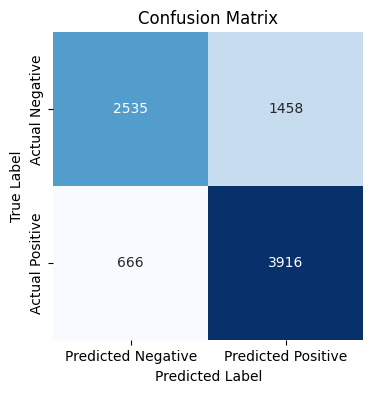

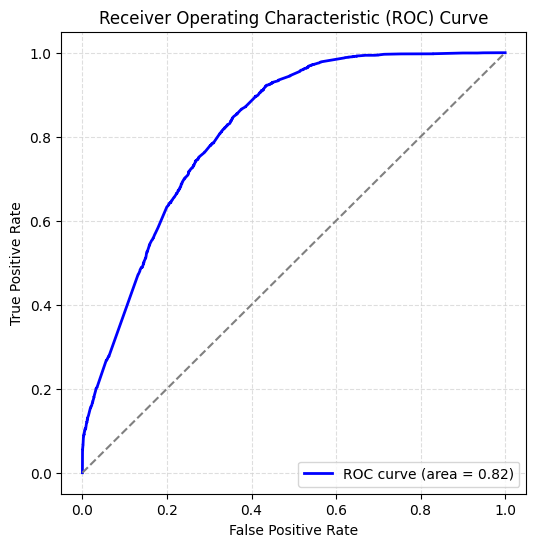

In [44]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix:
    [[ 7849  4196]
 [ 1739 11940]]

    AUC: 0.8401345704151626

    Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.65      0.73     12045
           1       0.74      0.87      0.80     13679

    accuracy                           0.77     25724
   macro avg       0.78      0.76      0.76     25724
weighted avg       0.78      0.77      0.77     25724

    
TEST METRICS
    Confusion Matrix:
    [[2518 1475]
 [ 653 3929]]

    AUC: 0.818352703219285

    Classification Report:
                  precision    recall  f1-score   support

           0       0.79      0.63      0.70      3993
           1       0.73      0.86      0.79      4582

    accuracy                           0.75      8575
   macro avg       0.76      0.74      0.74      8575
weighted avg       0.76      0.75      0.75      8575

    


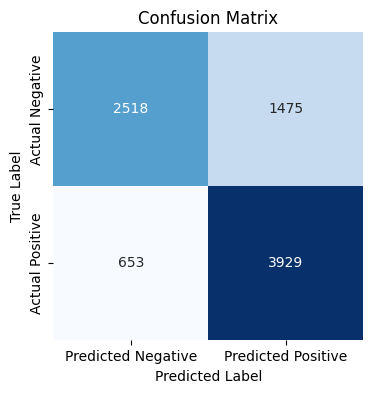

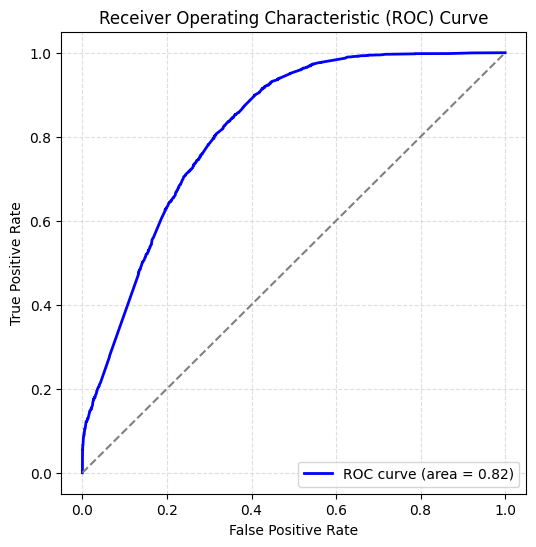

In [45]:
 # Step 2: Init the Model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)